## Autograded Notebook (Canvas & CodeGrade)

This notebook will be automatically graded. It is designed to test your answers and award points for the correct answers. Following the instructions for each Task carefully.

### Instructions

* **Download this notebook** as you would any other ipynb file
* **Upload** to Google Colab or work locally (if you have that set-up)
* **Delete `raise NotImplementedError()`**
* Write your code in the `# YOUR CODE HERE` space
* **Execute** the Test cells that contain `assert` statements - these help you check your work (others contain hidden tests that will be checked when you submit through Canvas)
* **Save** your notebook when you are finished
* **Download** as a `ipynb` file (if working in Colab)
* **Upload** your complete notebook to Canvas (there will be additional instructions in Slack and/or Canvas)

# Pixeltests School Data Science - Unit 1 Sprint 2 Module 2

## Hypothesis Testing - Chi square tests

### Objectives

* Objective 01 - explain the purpose of a chi-square test and identify applications
* Objective 02 - set up a chi-square test for independence on two categorical variables
* Objective 03 - use a chi-square test p-value to draw the correct conclusion about the null and alternative hypothesis
* Objective 04 - explain how to compare the null hypothesis and sample and how randomness in the sampling process affect the result

#### Total notebook points: 9

### Introduction

Slasher movies thrill audiences by portraying a lone antagonist (typically male) who attacks innocent victims with extreme violence and without apparent motive. However, this exciting (if gory) subgenre of horror film is criticized by those who view the violence as being used to “punish” female characters who engage in sexual activity during the film.

### Dataset description:

To test this claim, study authors randomly sampled 50 North American slasher films released from 1960 to 2009 and coded the 485 characters appearing in them as being male or female, involved in sexual activity or not, and if they survived the film or not.

The data appears in the `Slasher.csv` dataset. In this project, we are going to answer a slightly simpler question: Are female characters in slasher films more likely to be "murdered" than male characters?

You can find the `Slasher.csv` file and more information [here](https://github.com/LambdaSchool/data-science-practice-datasets/tree/main/unit_1/Slasher)

*Source: A. Welsh (2010). "On the Perils of Living Dangerously in the Slasher Horror Film: Gender Differences in the Association Between Sexual Activity and Survival," Sex Roles, Vol. 62 pp. 762-773*

**Task 1** - Load the data

Let's load the data! The URL has been provided as well as the imports for pandas and numpy.

* load your CSV file into a DataFrame named `df_slasher`

In [3]:
# Task 1

# Imports
import pandas as pd
import numpy as np

data_url = 'https://raw.githubusercontent.com/pixeltests/datasets/main/Slasher.csv'

# YOUR CODE HERE
df_slasher= pd.read_csv(data_url)

# Print out your DataFrame
df_slasher.head()

,ID,Gender,Activity,Survival
0,1,1,1,1
1,2,1,1,1
2,3,1,1,1
3,4,1,1,1
4,5,1,1,1


**Task 1 Test**

In [ ]:
# Task 1 - Test

assert isinstance(df_slasher, pd.DataFrame), 'Have you created a DataFrame named `df_slasher`?'
assert len(df_slasher) == 485


**Task 2**- Character percentages

In this dataset, the variable codes are:

* ID = Character ID
* Gender = Character gender.  0 = male, 1 = female
* Activity = Character was portrayed as engaged in sexual activity.  0 = no, 1 = yes
* Survival = Character survival in the film. 0 = did not survive, 1 = survived

Your task is to calculate the frequency and relative frequency of male and female characters in this set of slasher films.

* Compute the freqencies for "Gender" for this dataset; call your table `gender_frequencies`
* Compute the relative frequency of female characters and call this value `f_percent`
* Compute the relative frequency of male characters and call this value `m_percent`

In [ ]:
# Task 2

# YOUR CODE HERE
gender_frequencies= df_slasher['Gender'].value_counts(normalize=True) *100
m_percent =round(gender_frequencies[0],2)
f_percent = round(gender_frequencies[1],2)
print (m_percent, f_percent)

54.23 45.77


**Task 2 Test**

In [ ]:
# Task 2 - Test

assert isinstance(gender_frequencies, pd.Series), 'Have you calculated the gender frequencies?'


**Task 3** - Character survival

Calculate the frequency and relative frequency of character survival in this set of slasher films.

* Compute the frequencies for "Survival" for this dataset; call your table `survival_frequencies`
* Compute the frequency of character survival and call this value `survival`. Make sure to multiply by 100 so your value is a percent.

In [ ]:
# Task 3

# YOUR CODE HERE
survival_frequencies = df_slasher['Survival'].value_counts(normalize= True)*100
survival = round(survival_frequencies[1], 2)

# Print the percentage of characters that survive
print('Percentage of characters that survive:', survival)

Percentage of characters that survive: 17.53


**Task 3 Test**

In [ ]:
# Task 3 - Test

assert isinstance(survival_frequencies, pd.Series), 'Have you created the frequency table?'


**Task 4**- Joint distribution: character survival and character sex

Next, we're going to calculate the joint distribution of *character sex ("Gender")* and movie *survival*.

* Compute the joint distribution for character sex and survival and name your DataFrame `survival_fm_crosstab`.
    * **Make sure to use the following order of your variables: "Gender", "Survival"**

*Hint: If you are working from the in-class examples, it will be helpful to include character sex as the index variable. But play around with the arguments of `pd.crosstab()` to get a better idea of your table.*

In [ ]:
# Task 4

# YOUR CODE HERE
survival_fm_crosstab=pd.crosstab(df_slasher['Gender'],df_slasher['Survival'])

# Print the table
print(survival_fm_crosstab)

Survival    0   1
Gender           
0         228  35
1         172  50


**Task 4 Test**

In [ ]:
# Task 4 - Test

assert isinstance(survival_fm_crosstab, pd.DataFrame), 'Have you created the crosstab DataFrame?'


**Task 5** - Joint distribution with margins

Now we're going to find the joint distribution but this time add in the **table margins**.

* Compute the joint distribution and assign this to a variable called `survival_fm_margins`.

In [ ]:
# Task 5

# YOUR CODE HERE
survival_fm_margins =pd.crosstab(df_slasher['Gender'], df_slasher['Survival'],margins='All')

# Print the table
print(survival_fm_margins)

Survival    0   1  All
Gender                
0         228  35  263
1         172  50  222
All       400  85  485


**Task 5 Test**

In [ ]:
# Task 5 Test

assert isinstance(survival_fm_margins, pd.DataFrame), 'Did you create your joint distribution DataFrame?'
assert survival_fm_margins.shape == (3,3), "Did you include the margins in your distribution?"

# NO hidden tests for this task

**Task 6** - Joint distribution with normalization

Okay, now let's look at the distribution using the `normalize` argument. We want to compare the *relative* rate of survival. Calculate the distribution of survival conditional on character sex.

* Compute the joint distribution for character sex and survival and name your DataFrame `survival_fm_crosstab_norm` **and** normalize on the "index"
* Multiply the resulting DataFrame by 100 to return answers as percents
* Assign the *survival* percentage of female characters to the variable `survival_f`

In [ ]:
# Task 6

# YOUR CODE HERE
survival_fm_crosstab_norm = pd.crosstab(df_slasher['Gender'], df_slasher['Survival'],  normalize='index', margins=True)
survival_fm_crosstab_norm=survival_fm_crosstab_norm *100

#survival_f=survival_fm_crosstab_norm[1]['All']
survival_f = survival_fm_crosstab_norm[1][1]
# Print the percentage of female characters that survive
print(survival_fm_crosstab_norm)
print('Female character survival:', survival_f)

Survival          0          1
Gender                        
0         86.692015  13.307985
1         77.477477  22.522523
All       82.474227  17.525773
Female character survival: 22.52252252252252


**Task 6 Test**

In [ ]:
# Task 6 - Test

assert isinstance(survival_fm_crosstab_norm, pd.DataFrame), 'Have you created the crosstab DataFrame?'
assert survival_fm_crosstab_norm.all().min(axis=0) >= 1.0, "Did you multiply your values by 100?"


**Task 7 -** Statistical hypotheses

From the list of choices below, select the null and alternative hypotheses to test for a statistically significant relationship between character sex and survival.  Specify your answer in the next code block using `Answer = `.  For example, if the correct answer is choice B, you'll type `Answer = 'B'`.

A: $H_0$: Character sex and survival are related vs. $H_a$: Character sex and survival are unrelated$

B: $H_0$: Character sex and survival are unrelated vs. $H_a$: Character sex and survival are related$

C: $H_0: \mu_1 \neq \mu_2$ vs. $H_a: \mu_1 = \mu_2$

D: $H_0: \mu_1 = \mu_2$ vs. $H_a: \mu_1 \neq \mu_2$

In [ ]:
# Task 7

# YOUR CODE HERE
Answer='B'


**Task 7 Test**

In [ ]:
# Task 7 - Test
# Hidden tests - you will see the results when you submit to Canvas

**Task 8** - Chi-square test

Perform the chi-square test above using `stats.chi2_contingency()`. The docs for this function are found [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html).

* Compute the chi-square test and assign the p-value to the variable `p_val`
* Assign the other variables returned by the function to any variable names you prefer


In [ ]:
# Task 8

# Import the scipy.stats function
from scipy.stats import chi2_contingency

# YOUR CODE HERE
tstat =chi2_contingency(survival_fm_crosstab )
p_val=tstat.pvalue
# Print out the p-value
print('The p-value is:', p_val)

The p-value is: 0.011104692591139975


**Task 8 Test**

In [ ]:
# Task 8 Test
# Hidden tests - you will see the results when you submit to Canvas

**Task 9**

Select the correct conclusion at the 0.05 significance level from the list of choices below. Specify your answer in the next code block using `Answer = `.  For example, if the correct answer is choice B, you'll type `Answer = 'B'`.

A: We reject the null hypothesis at the 0.05 significance level and conclude that character survival and sex are related.

B: We fail to reject the null hypothesis at the 0.05 significance level and conclude that character survival and sex are related.

C: We reject the null hypothesis at the 0.05 significance level and conclude that character survival and sex are unrelated.

D: We fail to reject the null hypothesis at the 0.05 significance level and conclude that character survival and sex are unrelated.


In [ ]:
# Task 9

# YOUR CODE HERE
Answer='A'


**Task 9 Test**

In [ ]:
# Task 9 - Test
# Hidden tests - you will see the results when you submit to Canvas

**Task 10** - Create a bar plot

Create a side-by-side bar plot to illustrate the relationship between character sex and survival in slasher movies.  Sum up your overall results in a sentence or two.

This task will not be autograded - but it is part of completing the project.

In [29]:
df_slasher

f_total = df_slasher[(df_slasher.Gender == 1)&(df_slasher.Activity==1)]['Gender'].value_counts()
f_ns_total = df_slasher[(df_slasher.Gender == 1)&(df_slasher.Activity==1)&(df_slasher.Survival==0)]['Survival'].value_counts()
m_total = df_slasher[(df_slasher.Gender == 0)&(df_slasher.Activity==1)]['Gender'].value_counts()
m_ns_total = df_slasher[(df_slasher.Gender == 0) & (df_slasher.Activity==1)& (df_slasher.Survival ==0 )]['Survival'].value_counts()
print('Total male and female non survivors', m_ns_total.get(0), '/', m_total.get(0), '  and ', f_ns_total.get(0) , '/' ,f_total.get(1))


Total male and female non survivors 67 / 74   and  72 / 83


[74, 83] [67, 72]


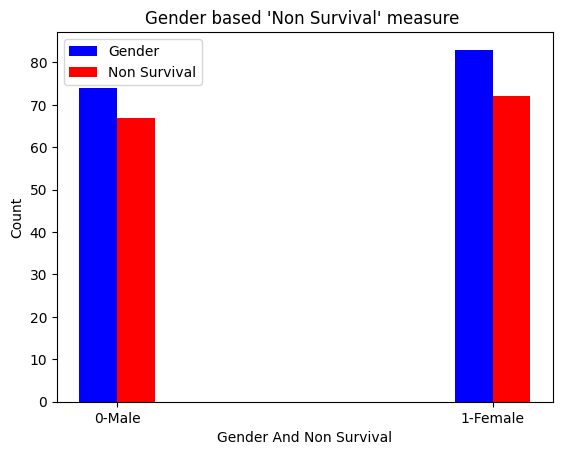

In [37]:
# Task 10
import matplotlib.pyplot as plt
import numpy as np

# YOUR CODE HERE
gender =[str(n) for n in sorted(df_slasher['Gender'].unique())]
N = len(gender)
ind =np.arange(N)

#data relates to gender or blue bar in the graph
genderCount= [m_total.get(0), f_total.get(1)]
#data realtes to non surival or red bar in the graph
nonSurvivalCount=[m_ns_total.get(0), f_ns_total.get(0)]

print(genderCount, nonSurvivalCount)
width=0.10
plt.bar(ind, genderCount, color ='blue', width=width, label = 'Gender')
plt.bar(ind+width, nonSurvivalCount, color ='red', width=width, label = 'Non Survival')
plt.xticks(ind + width / 2, ('0-Male', '1-Female'))
plt.legend(loc='best')

plt.xlabel('Gender And Non Survival')
plt.ylabel('Count')
plt.title("Gender based 'Non Survival' measure ")
plt.show()


**Task 10** - ANSWER

From the side by side bar graph its very evident that the survival rate of the character invovolved in sexual activity during the film is gender biased and there is strong relation between the gender and the survival of the character.